# Simulation results with r = 3 (order of interaction)

In [11]:
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join as oj
from collections import defaultdict
import dvu

from sklearn.cluster import SpectralBiclustering

from simulations_util import get_best_fit_line, get_feat_cooccurence, print_tree, get_feat_counts_cossim
from simulations_util import get_split_feats_counts, get_feat_counts_matrix

In [12]:
mpl.rcParams['grid.linewidth'] = 2.5
mpl.rcParams['legend.fontsize'] = 14
mpl.rcParams["figure.figsize"] = [8, 6]
plt.rcParams['figure.facecolor'] = 'white'
cs = {
    'SAPS': 'black',
    'CART': 'orange',
    'RF': "grey",
    "XGB" : "pink",
    "GAM" : "green"
}

label_size = 14
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size
mpl.rcParams['axes.labelsize'] = label_size
mpl.rcParams['axes.titlesize'] = label_size
mpl.rcParams['figure.titlesize'] = label_size

mpl.rcParams['figure.dpi'] = 250
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

fig_path = "results/figs/"

In [13]:
# n_train = [100, 250, 500, 750, 1000, 1500]
n_train = np.ceil(np.geomspace(100, 2500, 8)).astype(int)

## 1. Results for LSS

In [14]:
sim_name = "LSS"
(scores, error_bar) = pkl.load(open(oj('results/', "LSS", 'scores.pkl'), 'rb'))
best_fits = defaultdict(list)
for k in scores.keys():
    best_fits[k].append(get_best_fit_line(np.log(n_train), np.log(scores[k])))

In [15]:
best_fits

defaultdict(list,
            {'GAM': [[-0.04758713063229017, -0.35534912414410125]],
             'CART': [[-0.2731416728662812, 1.162771419033247]],
             'RF': [[-0.3493551490531469, 1.099155138566591]],
             'SAPS': [[-1.442165128432355, 6.978180351694833]],
             'XGB': [[-0.7329723509311267, 3.1644699796843008]]})

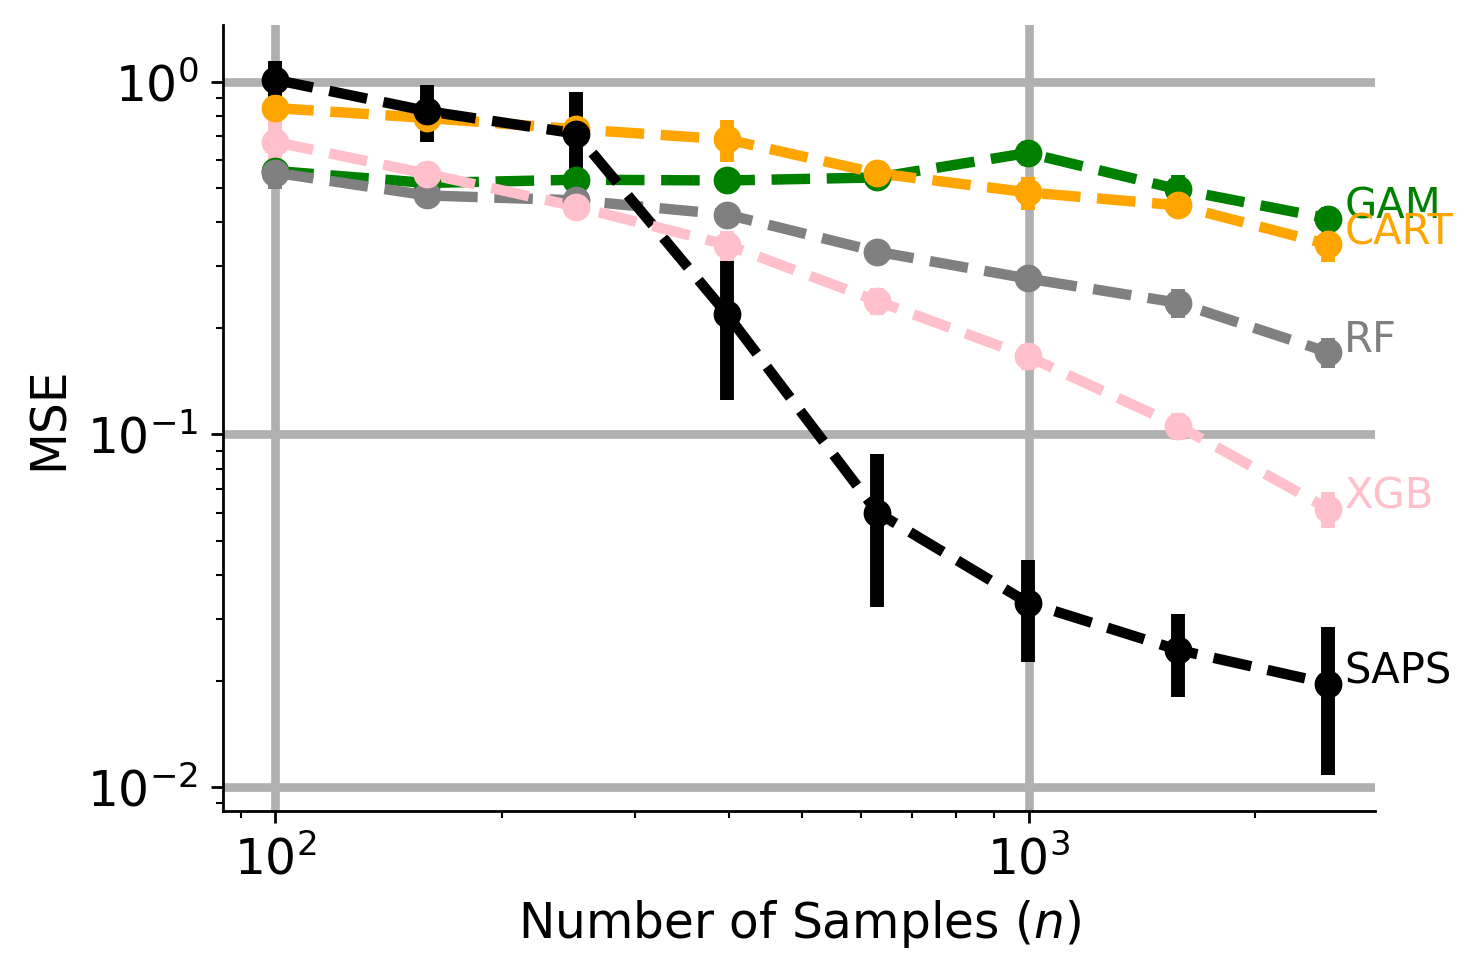

In [34]:
fig = plt.figure(figsize = (6, 4))

for k in scores.keys():
    kwargs = dict(color=cs[k], ms=7, elinewidth=4, lw=3)
   # slope = best_fits[k][0][0]
   # axs[0].errorbar(n_train, np.exp(slope * np.log(n_train) + best_fits[k][0][1]), linestyle = '--', **kwargs)
    plt.errorbar(n_train, scores[k], yerr=error_bar[k], fmt='o', **kwargs)
    plt.plot(n_train, scores[k], linestyle = '--', label=k, color=cs[k], lw=3)

#plt.legend(loc='best') #, labelcolor='linecolor')
plt.xlabel('Number of Samples ($n$)') #, fontsize=25)
plt.xscale('log')
plt.yscale('log')
#     plt.set_title(titles[i])
plt.grid()
plt.yticks([0.1, 0.2, 0.5, 1.0])
plt.ylabel('MSE')

plt.tight_layout(pad=0.4,w_pad=0.5, h_pad=1.5)
plt.yscale('log')
plt.xscale('log')
labels = [r'$2 \times \mathregular{10^{-1}}$', r'$5 \times \mathregular{10^{-1}}$', r'$\mathregular{10^{0}}$',r'$3 \times \mathregular{10^{0}}$']
dvu.line_legend(fontsize=12, xoffset_spacing=0.05, adjust_text_labels=False)

# plt.yticks(ytick, labels)
#viz.savefig(f'err_rate_{num}')
plt.savefig(fig_path + "LSS_error_curves")
plt.show()

## 2. Results for sum of polys

In [44]:
sim_name = "poly"
(scores, error_bar) = pkl.load(open(oj('results/', "poly", 'scores.pkl'), 'rb'))
best_fits = defaultdict(list)
for k in scores.keys():
    best_fits[k].append(get_best_fit_line(np.log(n_train), np.log(scores[k])))

In [45]:
best_fits

defaultdict(list,
            {'GAM': [[-0.2304517267290311, -1.273853289768963]],
             'CART': [[-0.14151837147536267, -1.2046753322634274]],
             'RF': [[-0.23696153886914045, -1.363771684130311]],
             'SAPS': [[-0.6598409687119836, 1.3094775548570763]],
             'XGB': [[-0.46160633462943923, -0.12328806064576653]]})

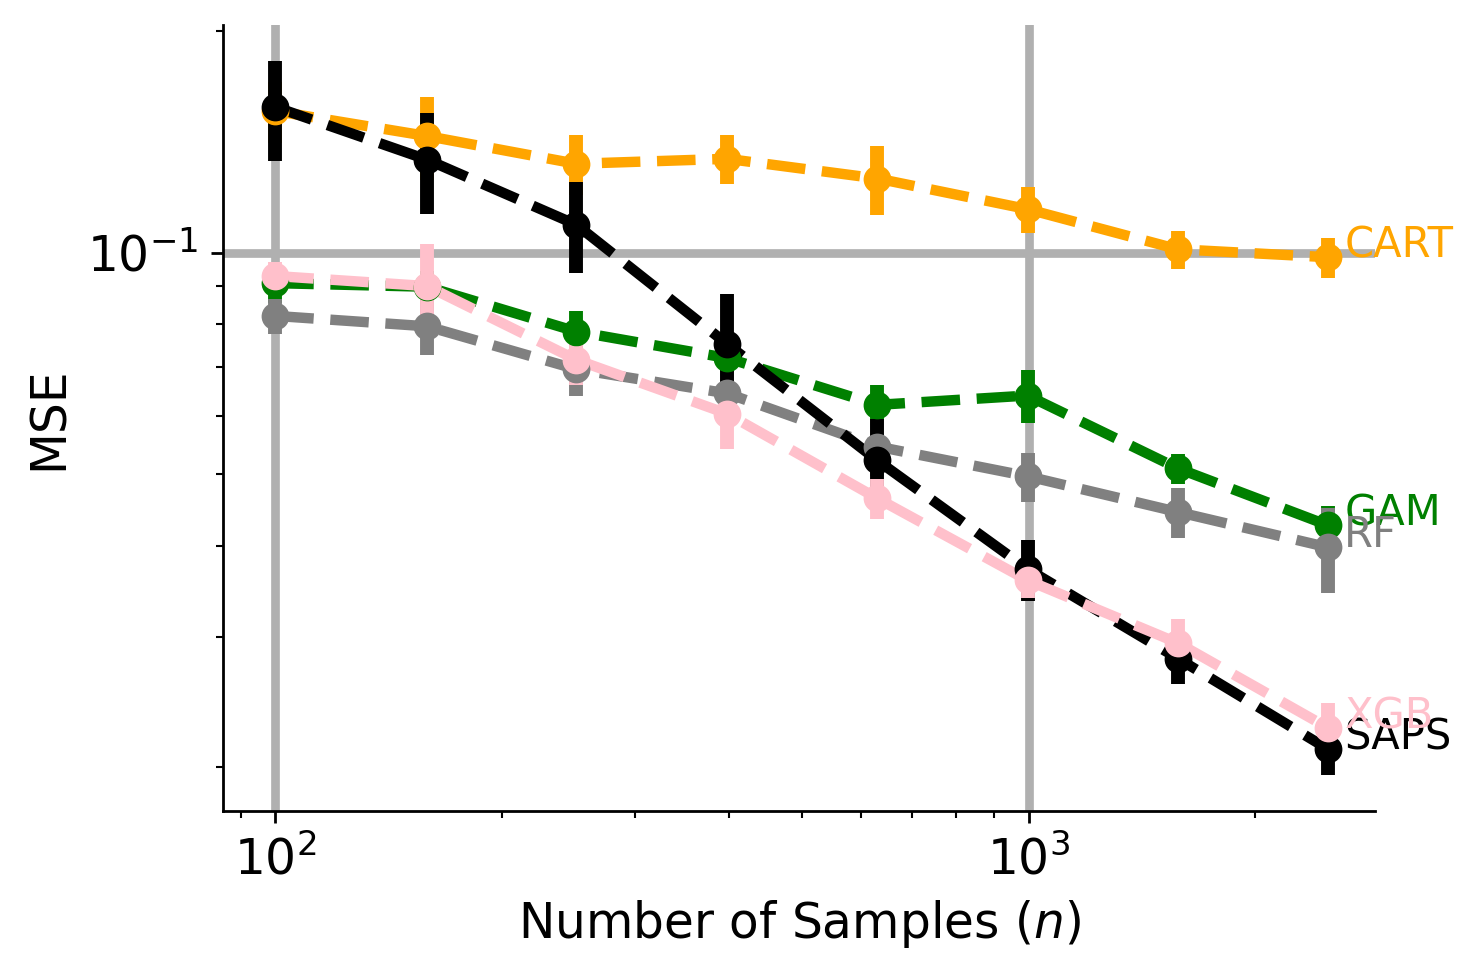

In [48]:
fig = plt.figure(figsize = (6, 4))

for k in scores.keys():
    kwargs = dict(color=cs[k], ms=7, elinewidth=4, lw=3)
    # slope = best_fits[k][0][0]
    # axs[0].errorbar(n_train, np.exp(slope * np.log(n_train) + best_fits[k][0][1]), linestyle = '--', **kwargs)
    plt.errorbar(n_train, scores[k], yerr=error_bar[k], fmt='o', **kwargs)
    plt.plot(n_train, scores[k], linestyle = '--', label=k, color=cs[k], lw=3)

#plt.legend(loc='best') #, labelcolor='linecolor')
plt.xlabel('Number of Samples ($n$)') #, fontsize=25)
plt.xscale('log')
plt.yscale('log')
#     plt.set_title(titles[i])
plt.grid()
plt.yticks([0.1, 0.2, 0.5, 1.0])
plt.ylabel('MSE')

plt.tight_layout(pad=0.4,w_pad=0.5, h_pad=1.5)
plt.yscale('log')
plt.xscale('log')
labels = [r'$2 \times \mathregular{10^{-1}}$', r'$5 \times \mathregular{10^{-1}}$', r'$\mathregular{10^{0}}$',r'$3 \times \mathregular{10^{0}}$']
dvu.line_legend(fontsize=12, xoffset_spacing=0.05, adjust_text_labels=False)

# plt.yticks(ytick, labels)
#viz.savefig(f'err_rate_{num}')
plt.savefig(fig_path + "poly_error_curves")
plt.show()

## 3. Results for linear

In [41]:
sim_name = "linear"
(scores, error_bar) = pkl.load(open(oj('results/', sim_name, 'scores.pkl'), 'rb'))
best_fits = defaultdict(list)
for k in scores.keys():
    best_fits[k].append(get_best_fit_line(np.log(n_train), np.log(scores[k])))

In [42]:
best_fits

defaultdict(list,
            {'GAM': [[-2.066772194874516, 10.5827865626983]],
             'CART': [[-0.1045255524078715, 0.935710953540125]],
             'RF': [[-0.19586666137844852, 0.7383363641235507]],
             'SAPS': [[-1.3424275774063161, 6.8607723488109915]],
             'XGB': [[-0.4226975492420579, 1.9876627159804872]]})

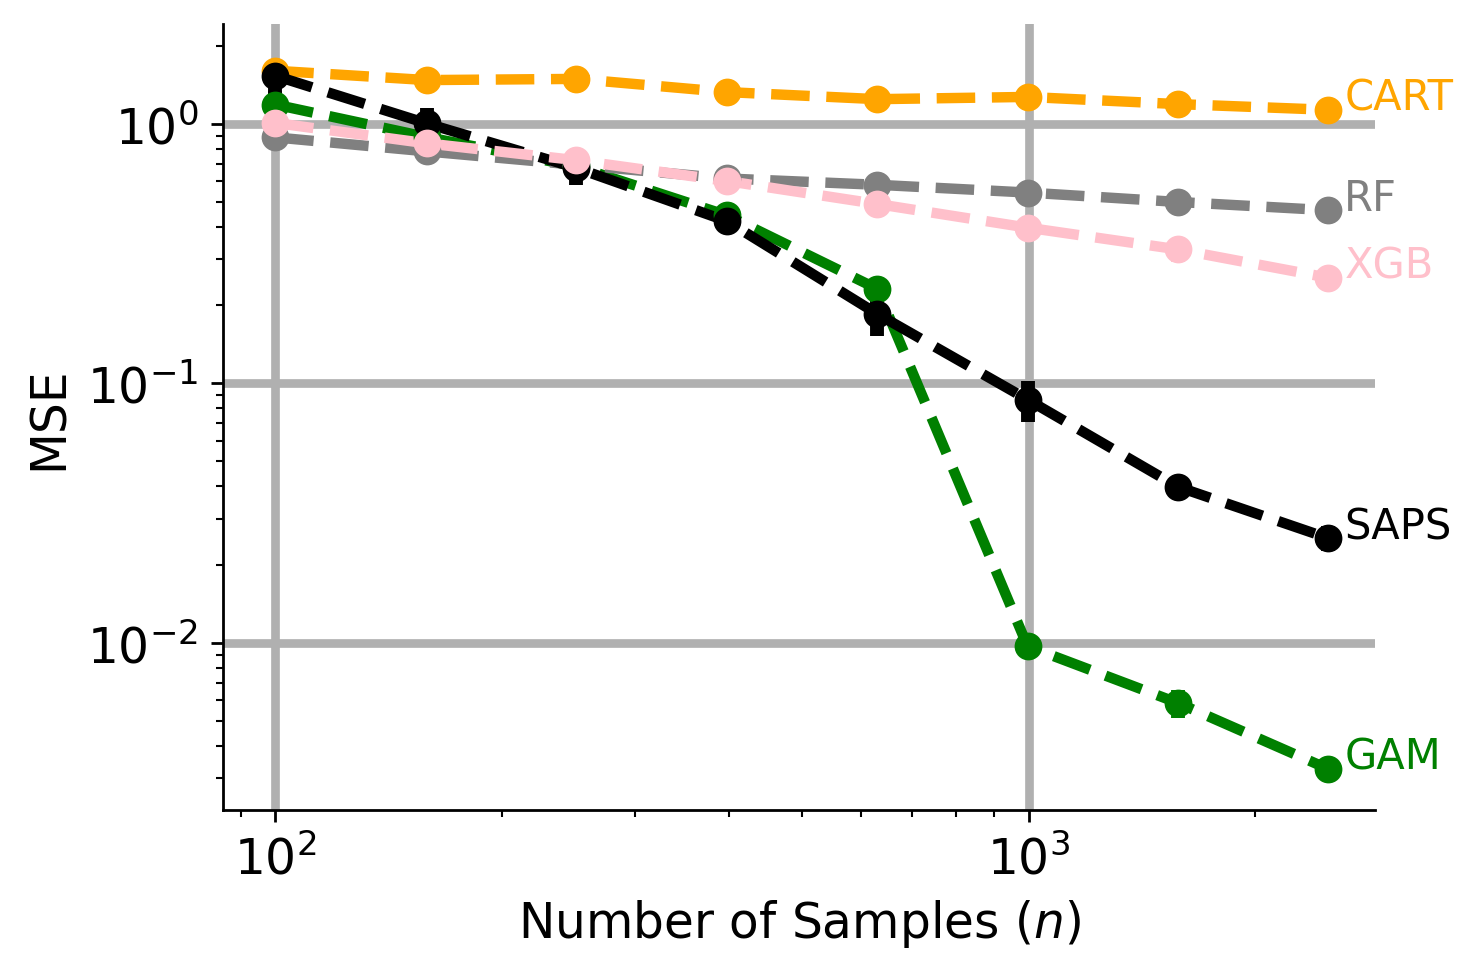

In [43]:
fig = plt.figure(figsize = (6, 4))

for k in scores.keys():
    kwargs = dict(color=cs[k], ms=7, elinewidth=4, lw=3)
    # slope = best_fits[k][0][0]
    # axs[0].errorbar(n_train, np.exp(slope * np.log(n_train) + best_fits[k][0][1]), linestyle = '--', **kwargs)
    plt.errorbar(n_train, scores[k], yerr=error_bar[k], fmt='o', **kwargs)
    plt.plot(n_train, scores[k], linestyle = '--', label=k, color=cs[k], lw=3)

#plt.legend(loc='best') #, labelcolor='linecolor')
plt.xlabel('Number of Samples ($n$)') #, fontsize=25)
plt.xscale('log')
plt.yscale('log')
#     plt.set_title(titles[i])
plt.grid()
plt.yticks([0.1, 0.2, 0.5, 1.0])
plt.ylabel('MSE')

plt.tight_layout(pad=0.4,w_pad=0.5, h_pad=1.5)
plt.yscale('log')
plt.xscale('log')
labels = [r'$2 \times \mathregular{10^{-1}}$', r'$5 \times \mathregular{10^{-1}}$', r'$\mathregular{10^{0}}$',r'$3 \times \mathregular{10^{0}}$']
dvu.line_legend(fontsize=12, xoffset_spacing=0.05, adjust_text_labels=False)

# plt.yticks(ytick, labels)
#viz.savefig(f'err_rate_{num}')
plt.savefig(fig_path + "linear_error_curves")
plt.show()

## 4. Results for single interaction

In [49]:
sim_name = "single_interaction"
(scores, error_bar) = pkl.load(open(oj('results/', sim_name, 'scores.pkl'), 'rb'))
best_fits = defaultdict(list)
for k in scores.keys():
    best_fits[k].append(get_best_fit_line(np.log(n_train), np.log(scores[k])))

In [15]:
best_fits

defaultdict(list,
            {'GAM': [[-0.04758713063229017, -0.35534912414410125]],
             'CART': [[-0.2731416728662812, 1.162771419033247]],
             'RF': [[-0.3493551490531469, 1.099155138566591]],
             'SAPS': [[-1.442165128432355, 6.978180351694833]],
             'XGB': [[-0.7329723509311267, 3.1644699796843008]]})

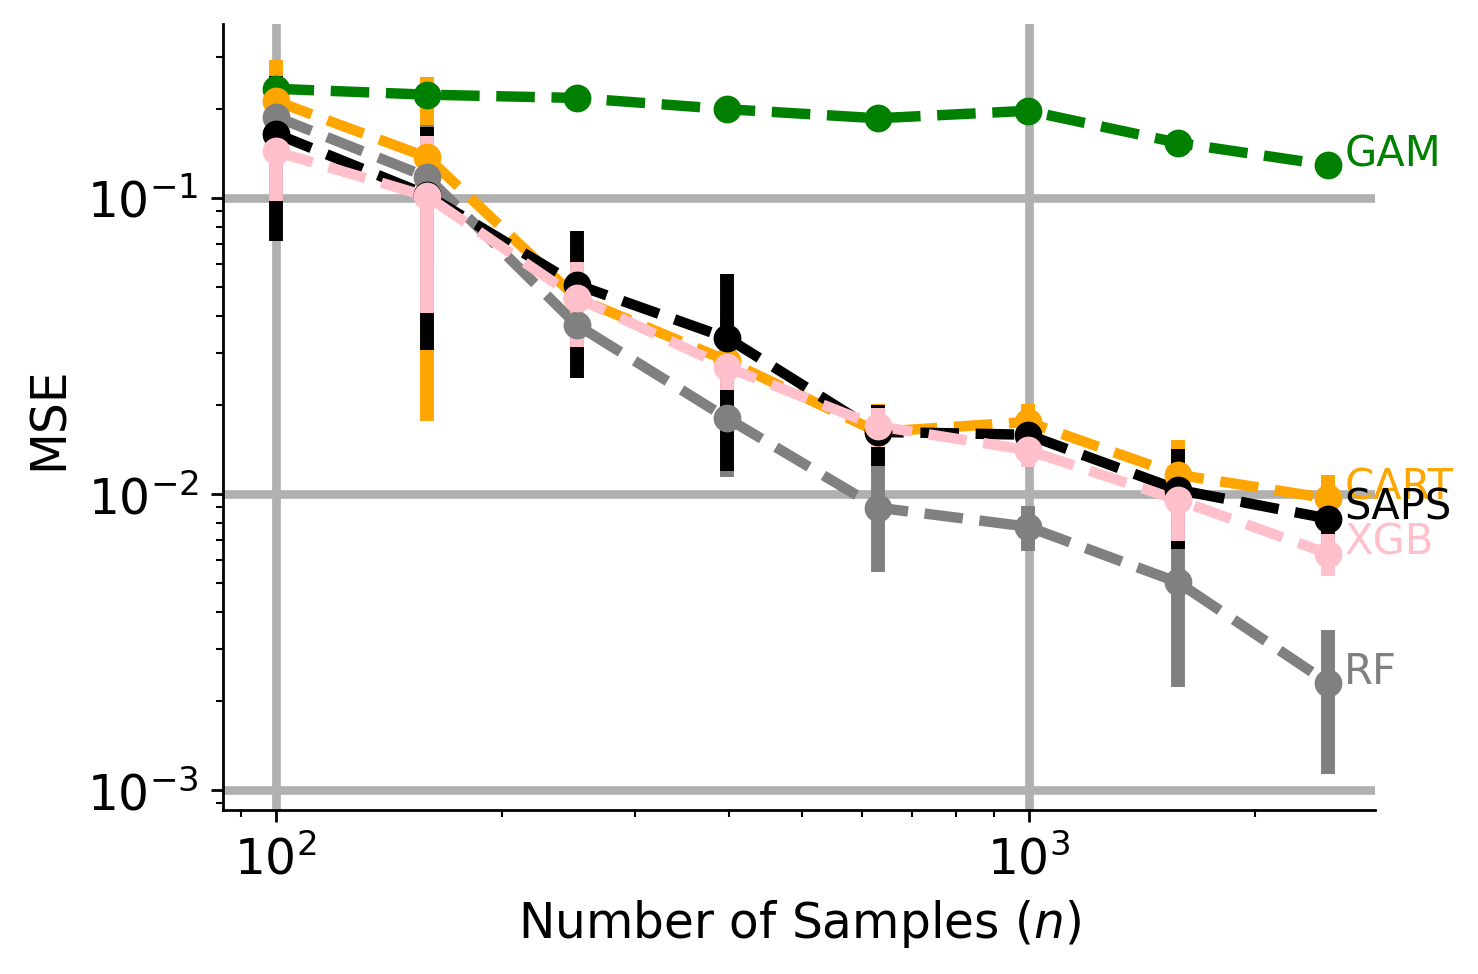

In [50]:
fig = plt.figure(figsize = (6, 4))

for k in scores.keys():
    kwargs = dict(color=cs[k], ms=7, elinewidth=4, lw=3)
   # slope = best_fits[k][0][0]
   # axs[0].errorbar(n_train, np.exp(slope * np.log(n_train) + best_fits[k][0][1]), linestyle = '--', **kwargs)
    plt.errorbar(n_train, scores[k], yerr=error_bar[k], fmt='o', **kwargs)
    plt.plot(n_train, scores[k], linestyle = '--', label=k, color=cs[k], lw=3)

#plt.legend(loc='best') #, labelcolor='linecolor')
plt.xlabel('Number of Samples ($n$)') #, fontsize=25)
plt.xscale('log')
plt.yscale('log')
#     plt.set_title(titles[i])
plt.grid()
plt.yticks([0.1, 0.2, 0.5, 1.0])
plt.ylabel('MSE')

plt.tight_layout(pad=0.4,w_pad=0.5, h_pad=1.5)
plt.yscale('log')
plt.xscale('log')
labels = [r'$2 \times \mathregular{10^{-1}}$', r'$5 \times \mathregular{10^{-1}}$', r'$\mathregular{10^{0}}$',r'$3 \times \mathregular{10^{0}}$']
dvu.line_legend(fontsize=12, xoffset_spacing=0.05, adjust_text_labels=False)

# plt.yticks(ytick, labels)
#viz.savefig(f'err_rate_{num}')
plt.savefig(fig_path + sim_name + "_error_curves")
plt.show()

## Plotting feature co-occurence matrix for LSS

In [8]:
sim_name = "LSS"
trees = pkl.load(open(oj('results/', sim_name, 'trees.pkl'), 'rb'))
len(trees)

81

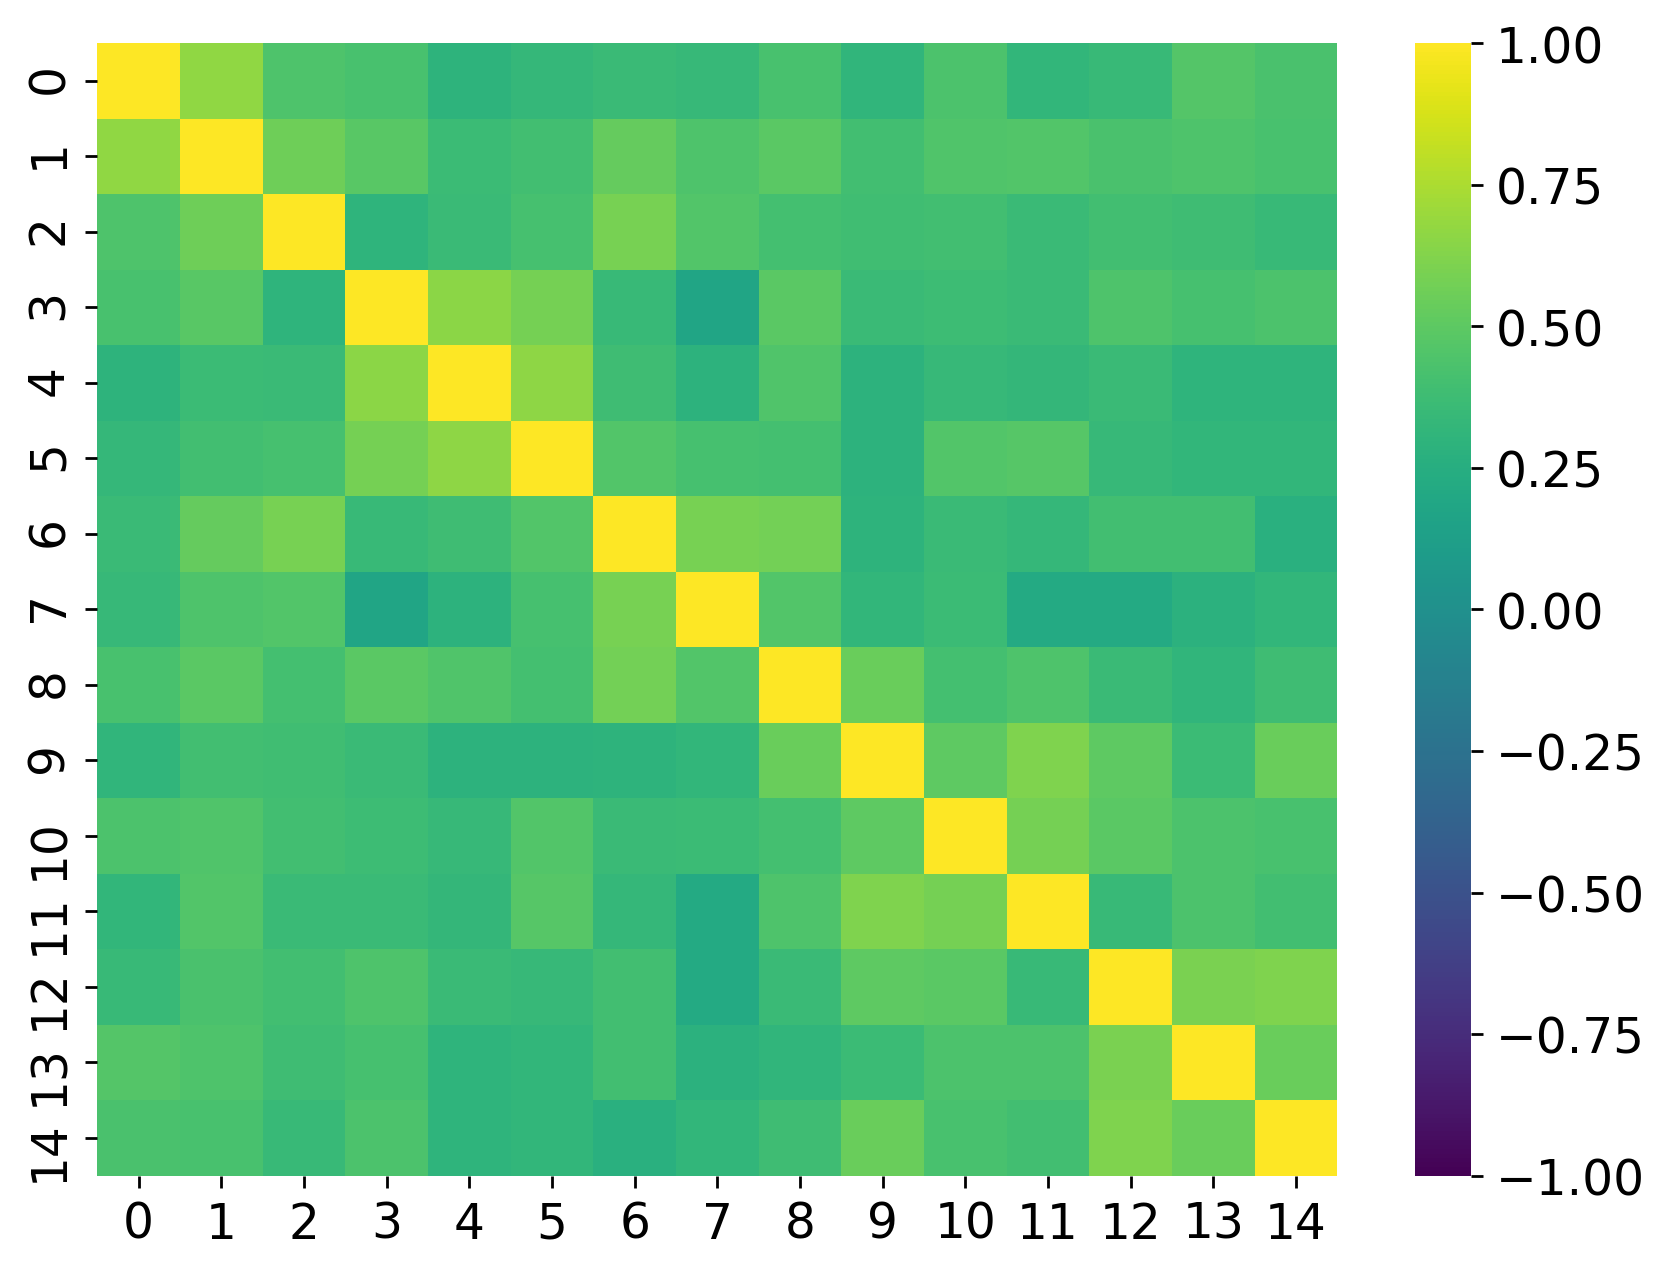

In [10]:
sns.heatmap(get_feat_counts_cossim(trees, 15), cmap="viridis", norm=mpl.colors.CenteredNorm())
plt.show()

<AxesSubplot:>

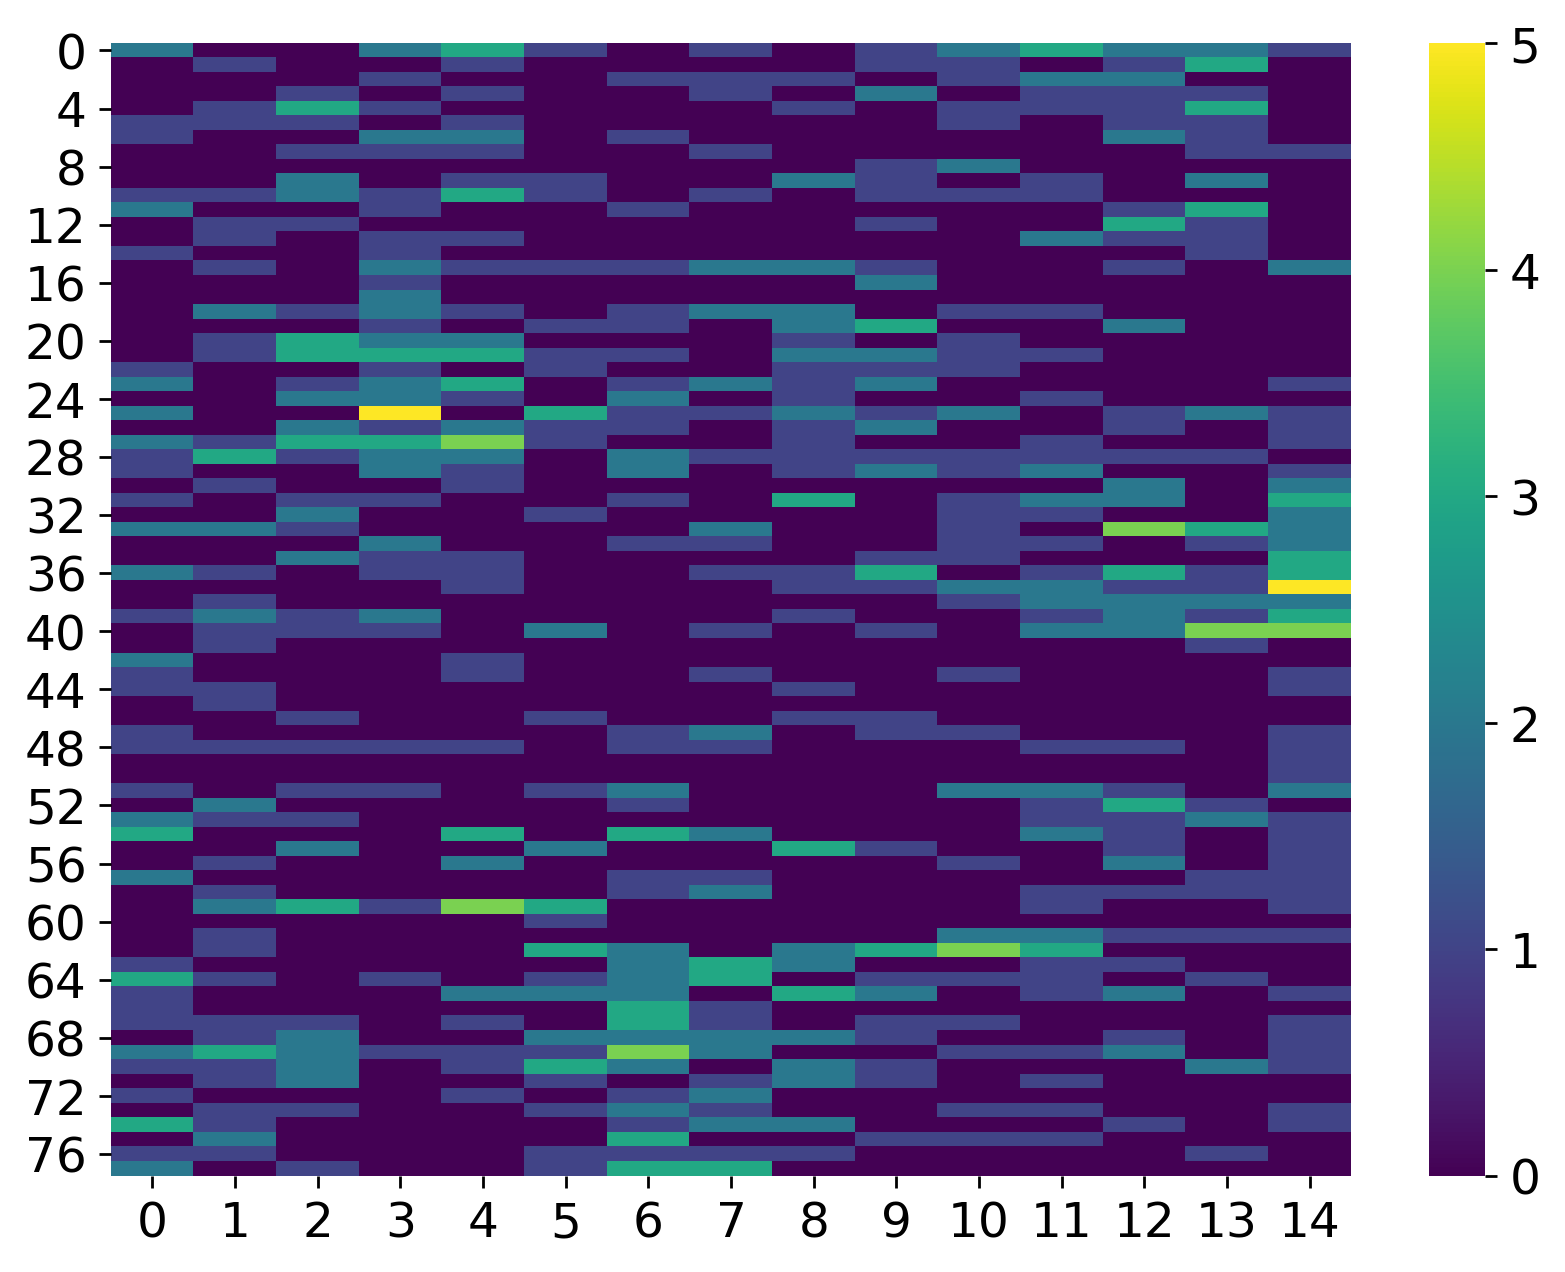

In [51]:
counts_matrix = get_feat_counts_matrix(trees, 15)[get_feat_counts_matrix(trees, 15).sum(axis=1)!=0,:]
clustering = SpectralBiclustering(n_clusters=5, random_state=0).fit(counts_matrix)
counts_matrix_sorted = counts_matrix[np.argsort(clustering.row_labels_),:][:,np.argsort(clustering.column_labels_)]
sns.heatmap(counts_matrix_sorted, cmap="viridis")
plt.show()

## Plotting feature co-occurence matrix for sum of polys

In [4]:
sim_name = "poly"
trees = pkl.load(open(oj('results/', sim_name, 'trees.pkl'), 'rb'))
len(trees)

142

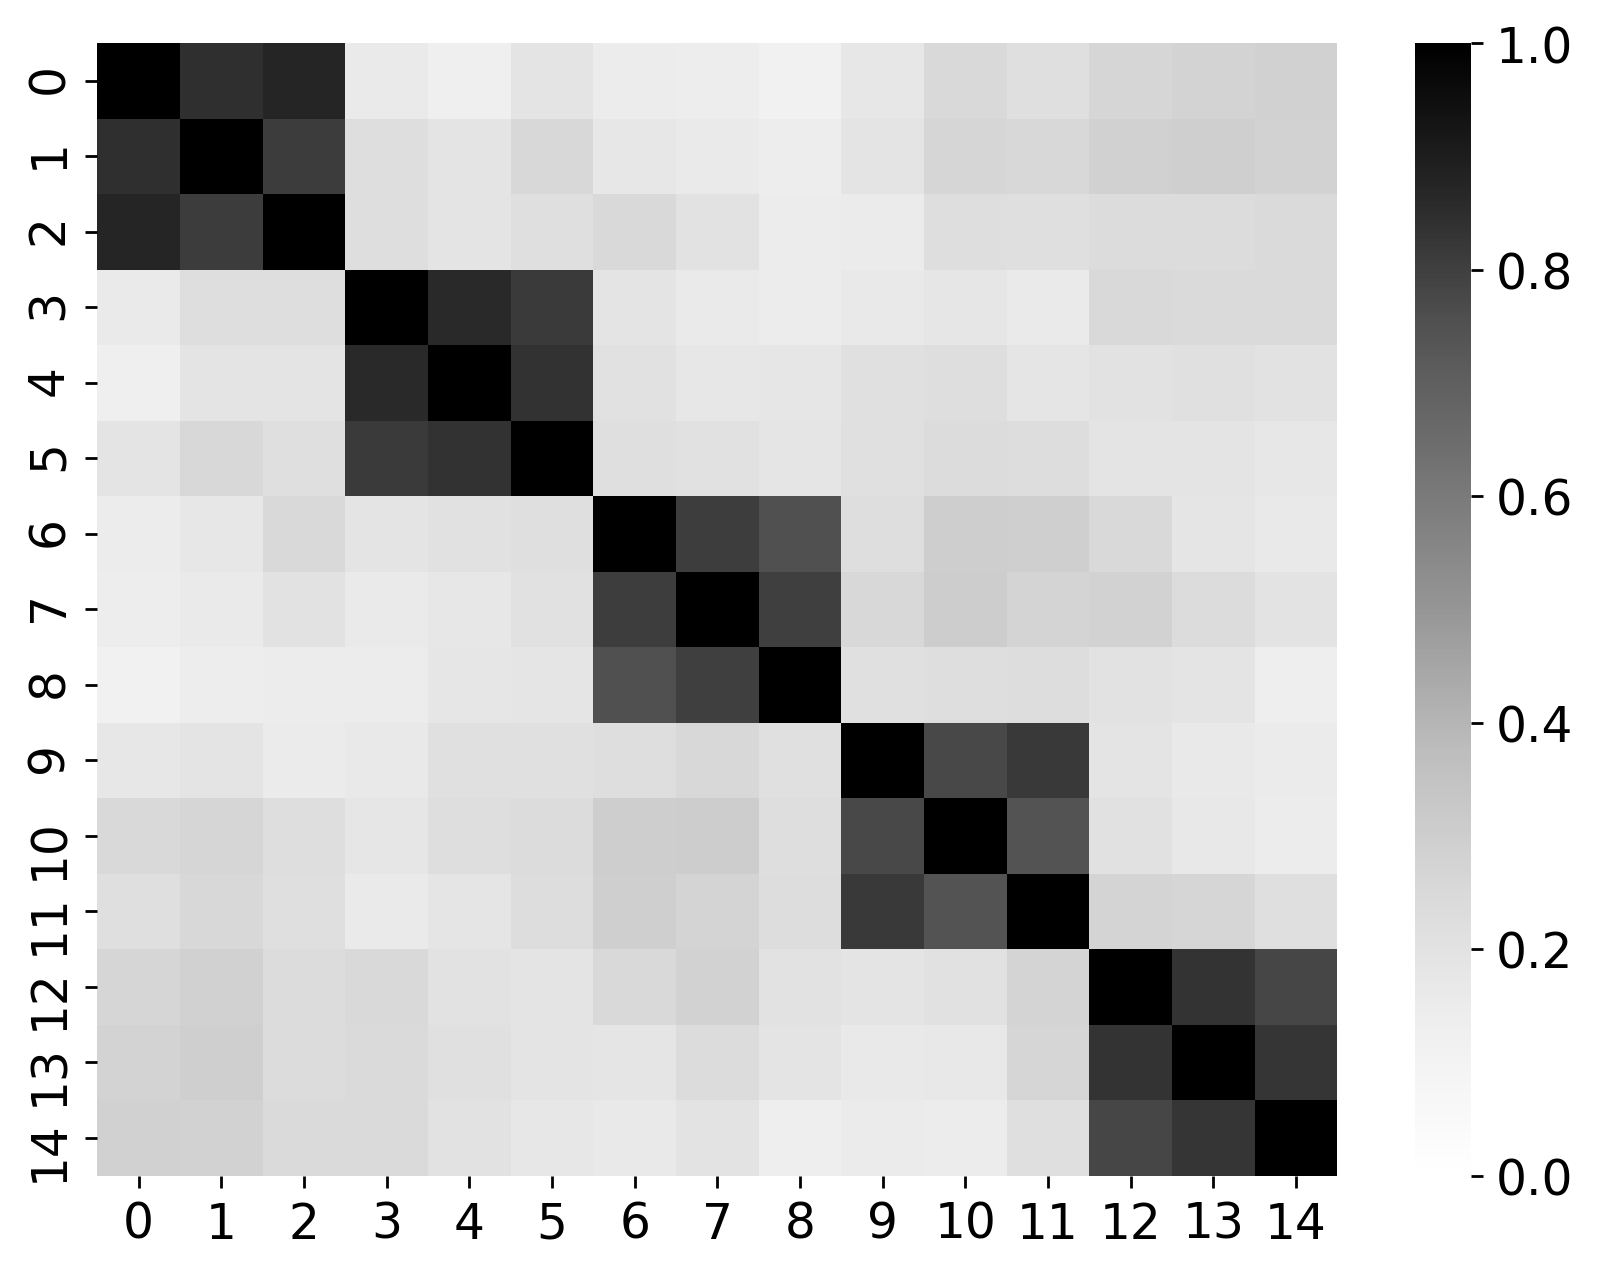

In [8]:
sns.heatmap(get_feat_counts_cossim(trees, 15),
            cmap="Greys", vmin=0)
plt.savefig(fig_path + "sum_of_poly_heatmap")
plt.show()

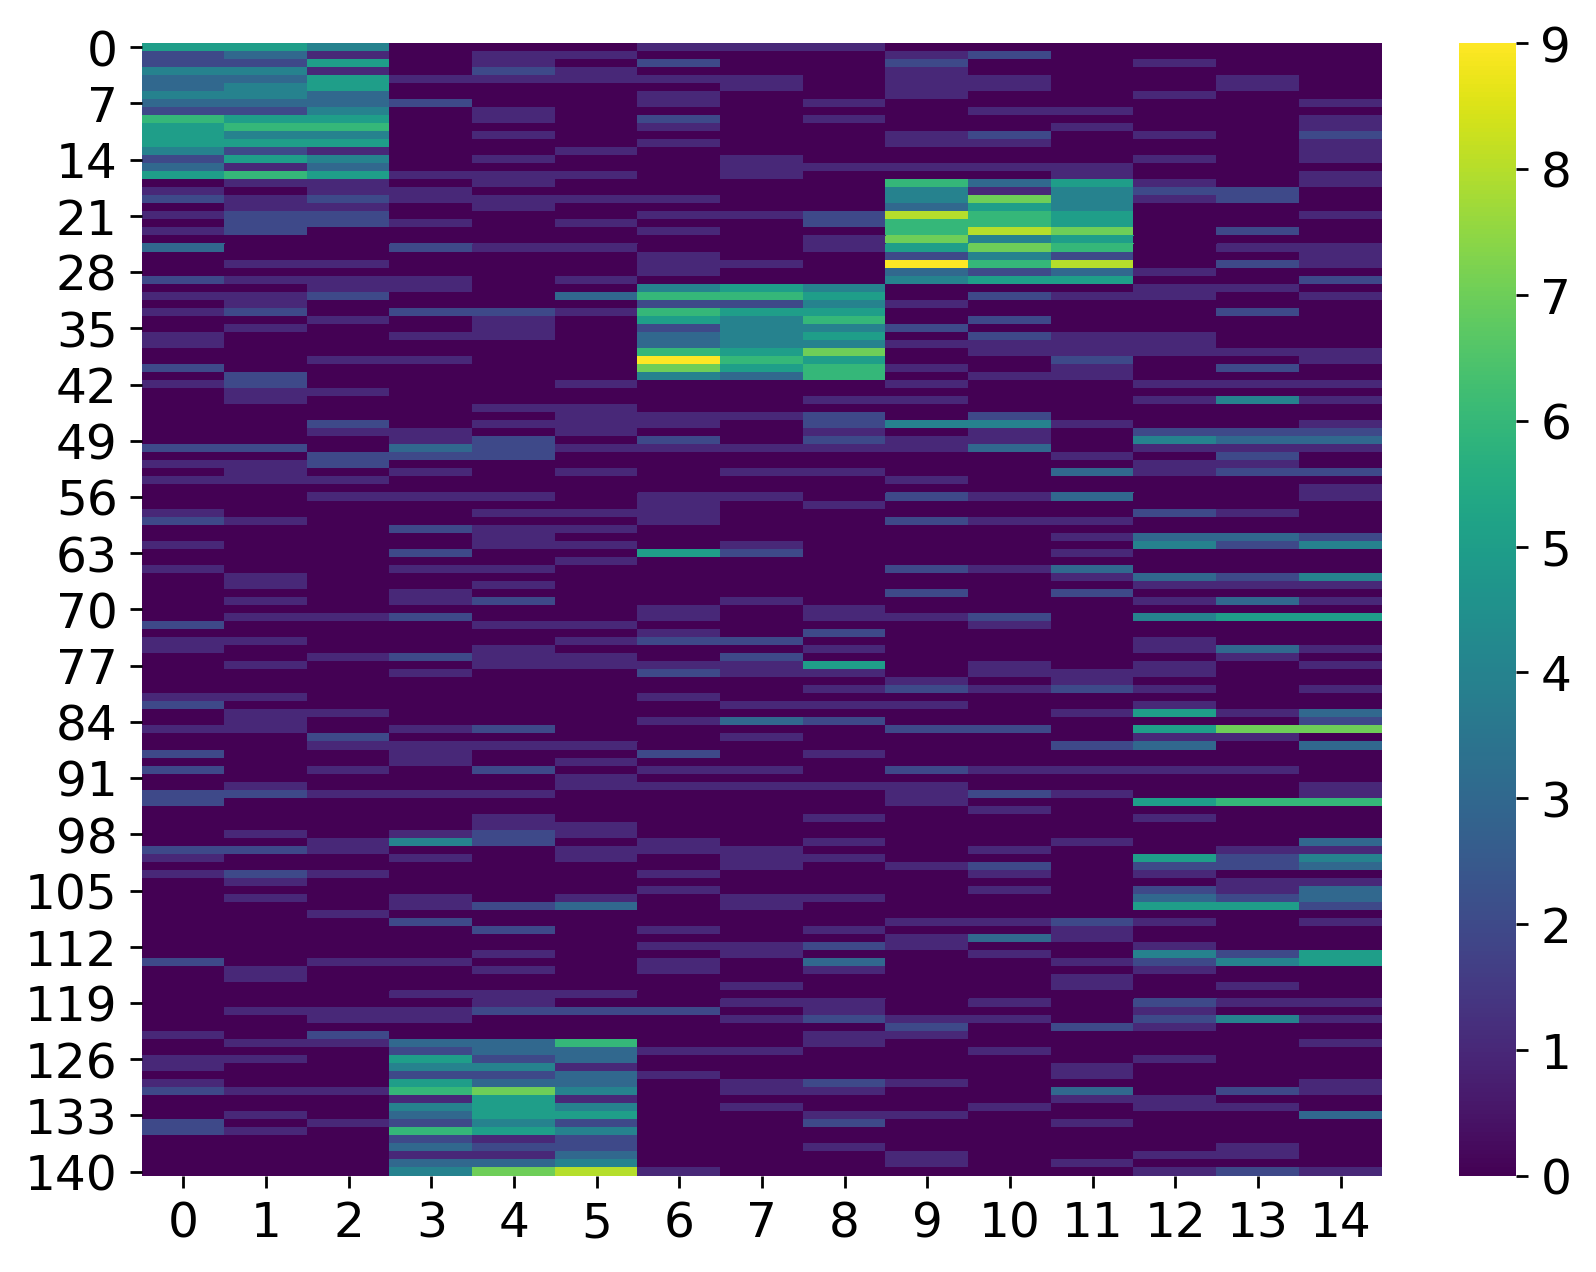

In [5]:
counts_matrix = get_feat_counts_matrix(trees, 15)[get_feat_counts_matrix(trees, 15).sum(axis=1)!=0,:]
clustering = SpectralBiclustering(n_clusters=5, random_state=0).fit(counts_matrix)
counts_matrix_sorted = counts_matrix[np.argsort(clustering.row_labels_),:][:,np.argsort(clustering.column_labels_)]
sns.heatmap(counts_matrix_sorted, cmap="viridis")
plt.show()

In [9]:
block_structure = np.zeros((15, 15))
for i in range (5):
    block_structure[3*i:3*i+3,3*i:3*i+3] = 1

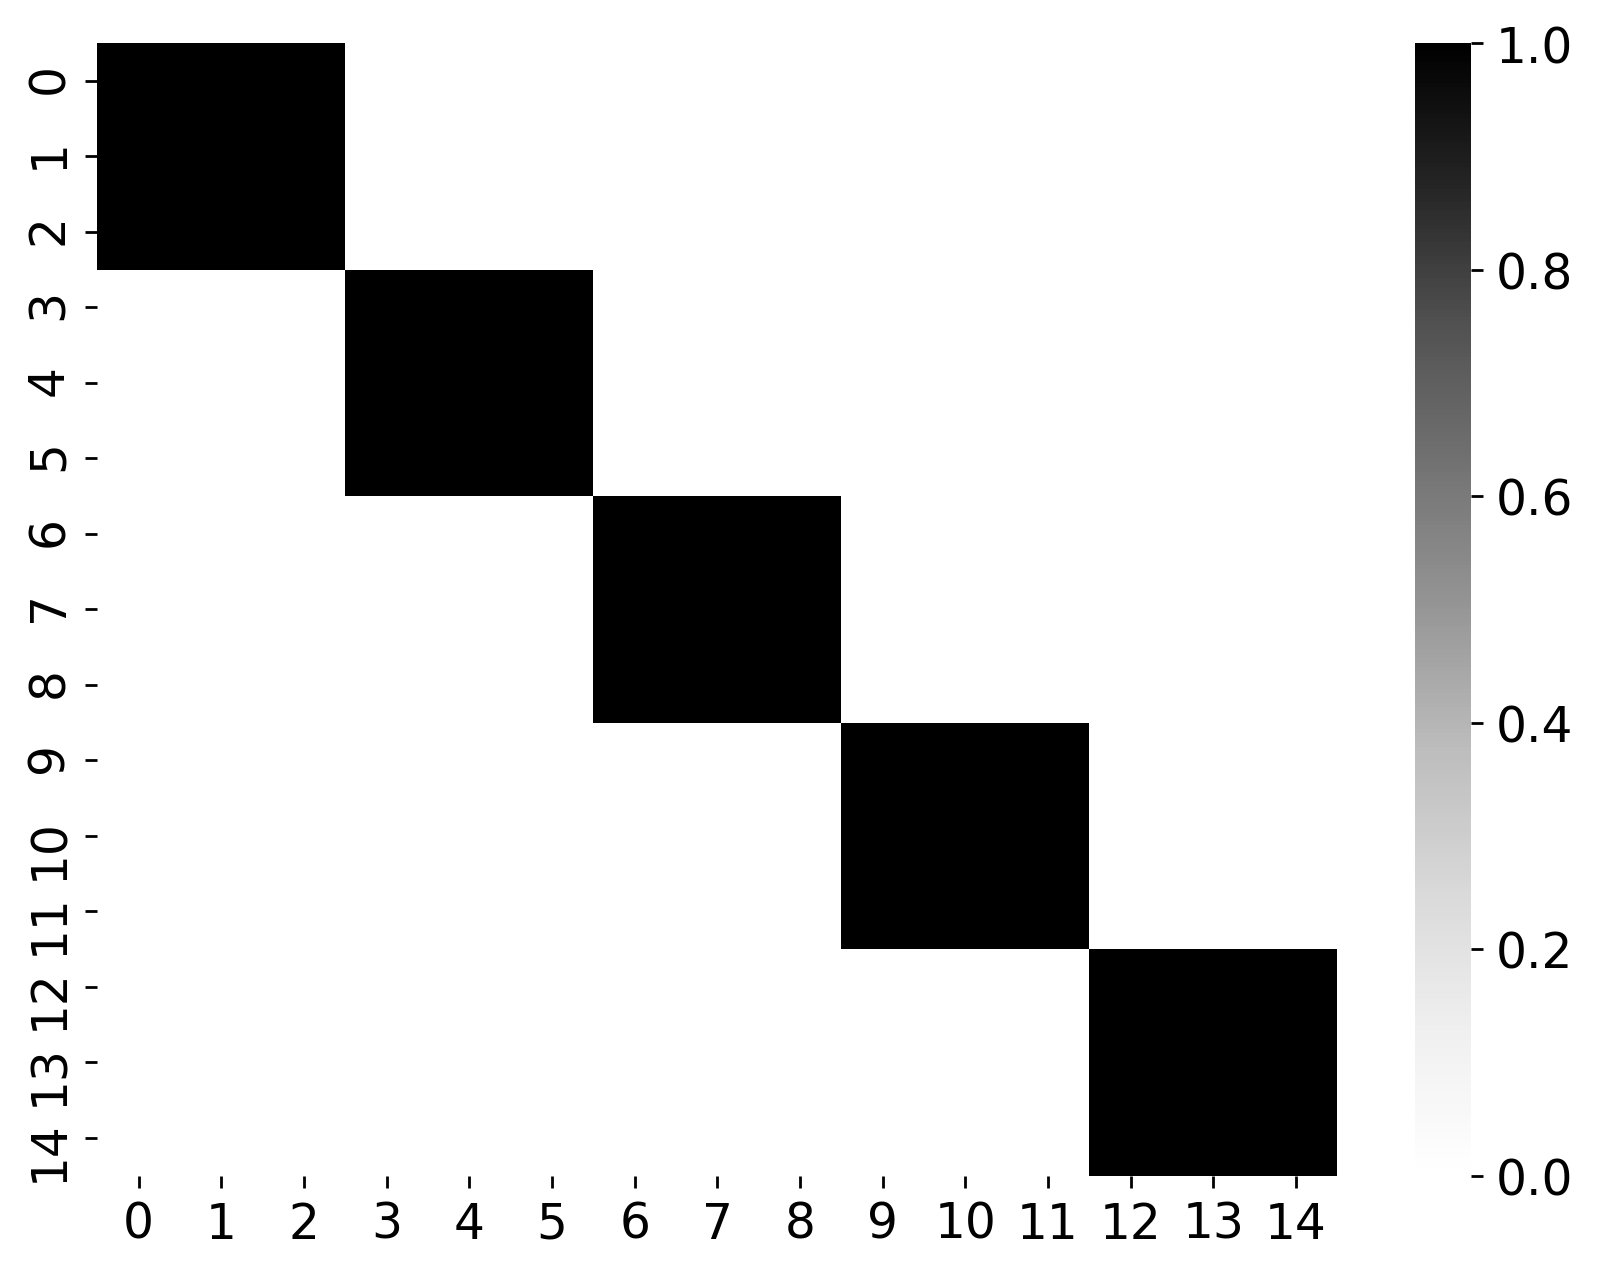

In [10]:
sns.heatmap(block_structure, cmap="Greys", vmin=0)
plt.savefig(fig_path + "sum_of_poly_truth_heatmap")
plt.show()